# Recurrent Neural Network - Google Stock Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Importing the training set only

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [16]:
# Feature Scaling our data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a Data Structure

X_train = []
y_train = []

for i in range(60,1258):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [20]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [22]:
X_train.shape

(1198, 60)

In [23]:
y_train.shape

(1198,)

In [25]:
# Reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [27]:
X_train.shape # 3D Tensor Shape

(1198, 60, 1)

##### BUILDING OUR RNN

In [30]:
# Importing our libraries

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [31]:
# Initializing the RNN

regressor = Sequential()

In [33]:
# Adding the first LSTM layer & Dropout Regularization

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [34]:
# Adding the second LSTM layer & Dropout Regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the third LSTM layer & Dropout Regularization

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [35]:
# Adding the fourth LSTM layer & Dropout Regularization

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [36]:
# Adding the final output layer

regressor.add(Dense(units = 1))

In [37]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [38]:
# Fitting the RNN to the training set

regressor.fit(X_train, y_train, epochs = 105, batch_size = 32)

Epoch 1/105
38/38 [==============================] - 5s 121ms/step - loss: 0.0464
Epoch 2/105
38/38 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 3/105
38/38 [==============================] - 5s 120ms/step - loss: 0.0059
Epoch 4/105
38/38 [==============================] - 5s 121ms/step - loss: 0.0047
Epoch 5/105
38/38 [==============================] - 5s 121ms/step - loss: 0.0061
Epoch 6/105
38/38 [==============================] - 5s 123ms/step - loss: 0.0049
Epoch 7/105
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 8/105
38/38 [==============================] - 4s 114ms/step - loss: 0.0051
Epoch 9/105
38/38 [==============================] - 4s 117ms/step - loss: 0.0041
Epoch 10/105
38/38 [==============================] - 5s 129ms/step - loss: 0.0041
Epoch 11/105
38/38 [==============================] - 5s 127ms/step - loss: 0.0042
Epoch 12/105
38/38 [==============================] - 5s 128ms/step - loss: 0.0038
Epoch 13/105


38/38 [==============================] - 4s 105ms/step - loss: 0.0014
Epoch 100/105
38/38 [==============================] - 4s 106ms/step - loss: 0.0013
Epoch 101/105
38/38 [==============================] - 4s 104ms/step - loss: 0.0013
Epoch 102/105
38/38 [==============================] - 4s 104ms/step - loss: 0.0012
Epoch 103/105
38/38 [==============================] - 4s 104ms/step - loss: 0.0014
Epoch 104/105
38/38 [==============================] - 4s 105ms/step - loss: 0.0012
Epoch 105/105
38/38 [==============================] - 4s 104ms/step - loss: 0.0014


In [42]:
# Making the predictions and visualizing the final results

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [66]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_prices = regressor.predict(X_test)
predicted_stock_prices = sc.inverse_transform(predicted_stock_prices)

In [67]:
predicted_stock_prices

array([[780.60156],
       [777.8978 ],
       [780.5556 ],
       [782.27045],
       [785.9144 ],
       [792.5177 ],
       [796.44257],
       [795.88654],
       [795.6136 ],
       [796.28845],
       [797.04517],
       [797.20856],
       [797.17834],
       [798.1644 ],
       [799.1933 ],
       [805.9837 ],
       [813.4035 ],
       [819.59204],
       [820.3342 ],
       [811.157  ]], dtype=float32)

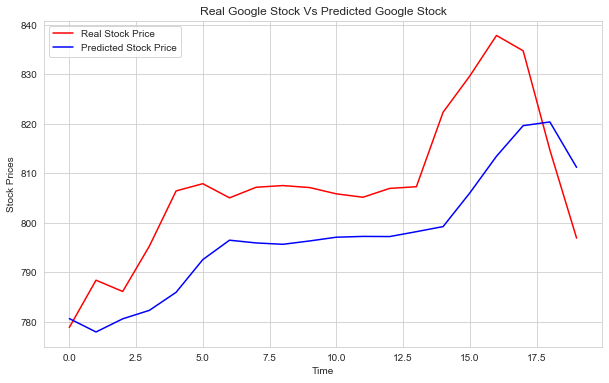

In [74]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Stock Price')
plt.title('Real Google Stock Vs Predicted Google Stock')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()